## Libraries

In [1]:
import numpy as np
import pandas as pd
import scipy

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

## Hierarchical Clustering

In [4]:
# Load the data, contained in the segmentation data csv file.
df_segmentation = pd.read_csv('segmentation data.csv', index_col = 0)

# Standardizing data, so that all features have equal weight. This is important for modelling.
# Otherwise, in our case Income would be considered much more important than Education for Instance. 
# We do not know if this is the case, so we would not like to introduce it to our model. 
scaler = StandardScaler()
segmentation_std = scaler.fit_transform(df_segmentation)

# Perform Hierarchical Clustering. The results are returned as a linkage matrix. 
hier_clust = linkage(segmentation_std, method = 'ward')

/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda2/lib/python2.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


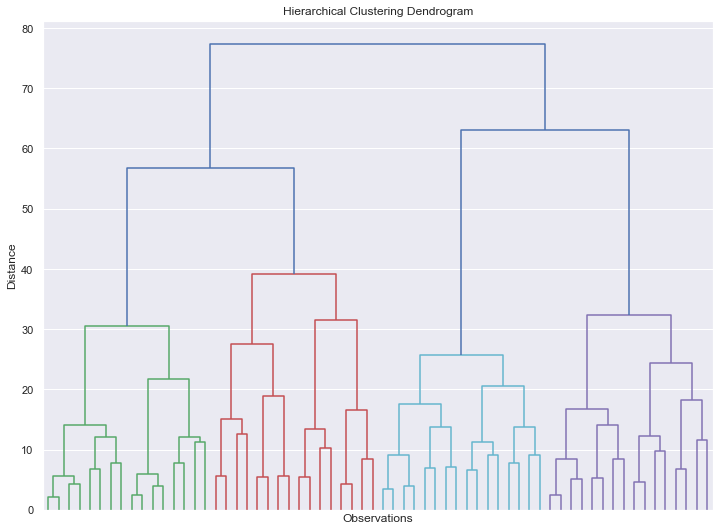

In [5]:
# plotting the results from the Hierarchical Clustering using a Dendrogram. 
# The dendrogram's level p shows only the last p merged clusters.
# showing the labels for each point was also omitted.
plt.figure(figsize = (12,9))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Observations')
plt.ylabel('Distance')
dendrogram(hier_clust,
           truncate_mode = 'level', 
           p = 5, 
           show_leaf_counts = False, 
           no_labels = True)
plt.show()

In [ ]:
# Hierarchical clustering finds the right number of clusters in data (4 in this case).

# Usually in practice we use flat clustering techniques rather than hierarchical techniques, 
# they’re way faster, but if we have no prior knowledge about the number of cluster we can start by 
# performing hierarchical clustering to determine them.

# Then we can use flat clustering for the segmentation itself.